# Coding assignment
This notebook, details observations and analysis requried for the answer to Q3.

- As the last step, please write a program to help you decide if the previous gold or silver prices are good predictors for their future prices. Also do the same to check if an increase or decrease in the price is predictable. (There is no need to do the actual prediction.)

Q3 is answered in 2 parts, 
- **Part 1** : if the previous gold or silver prices are good predictors for their future prices.
- **Part 2** : check if an increase or decrease in the price is predictable.


In [1]:
# Load libraries required for analysis
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pylab as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


As part of Q1, we have used a nodejs based program to fetch the historical prices and dates of gold and silver from these 2 URLs:
- https://www.investing.com/commodities/gold-historical-data
- https://www.investing.com/commodities/silver-historical-data

for data worth of past 10years (start date:03/06/2008, end date: 03/06/2018), and store them locally as historical-gold.csv & historical-silver.csv respectivey.
 
In next section, we will read the data into dataframes to

In [2]:
headers = ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change%'] 
parse_dates = ['Date']
historical_data_gold = pd.read_csv('historical-gold.csv', sep='~', parse_dates=parse_dates,encoding ='utf-8')
historical_data_gold.columns= headers

historical_data_silver = pd.read_csv('historical-silver.csv', sep='~', parse_dates=parse_dates,encoding ='utf-8')
historical_data_silver.columns= headers


In [3]:
print ("Gold commodity has {} observations & {} features".format(*historical_data_gold.shape))
print ("Silver commodity has {} observations & {} features".format(*historical_data_silver.shape))

Gold commodity has 2579 observations & 7 features
Silver commodity has 2956 observations & 7 features


In [4]:
historical_data_gold.head(2)

,Date,Price,Open,High,Low,Vol.,Change%
0,2018-03-01,"1,305.20","1,319.30","1,322.30","1,303.60",421.74K,-0.96%
1,2018-02-28,"1,317.90","1,318.90","1,323.70","1,316.70",263.80K,-0.05%


In [5]:
historical_data_silver.head(2)

,Date,Price,Open,High,Low,Vol.,Change%
0,2018-03-01,16.200,16.350,16.465,16.09,0.56K,-0.76%
1,2018-02-28,16.324,16.335,16.430,16.30,1.02K,-0.13%


In [6]:
historical_data_gold.apply(lambda x:sum(x.isnull()))

Date       0
Price      0
Open       0
High       0
Low        0
Vol.       0
Change%    0
dtype: int64

In [7]:
historical_data_silver.apply(lambda x:sum(x.isnull()))

Date       0
Price      0
Open       0
High       0
Low        0
Vol.       0
Change%    0
dtype: int64

In [8]:
historical_data_gold.describe()

,Date,Price,Open,High,Low,Vol.,Change%
count,2579,2579,2579,2579,2579,2579,2579
unique,2579,2145,2152,2123,2162,551,542
top,2016-11-14 00:00:00,"1,273.40","1,247.70","1,235.20","1,218.60",0.02K,0.01%
freq,1,5,4,4,5,158,22
first,2008-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
from IPython.display import display
display(historical_data_gold[:10].T)

,0,1,2,3,4,5,6,7,8,9
Date,2018-03-01 00:00:00,2018-02-28 00:00:00,2018-02-27 00:00:00,2018-02-26 00:00:00,2018-02-23 00:00:00,2018-02-22 00:00:00,2018-02-21 00:00:00,2018-02-20 00:00:00,2018-02-19 00:00:00,2018-02-18 00:00:00
Price,"1,305.20","1,317.90","1,318.60","1,332.80","1,330.30","1,332.70","1,332.10","1,331.20","1,347.80","1,350.50"
Open,"1,319.30","1,318.90","1,334.70","1,330.40","1,333.70","1,326.20","1,331.20","1,350.20","1,350.40","1,349.70"
High,"1,322.30","1,323.70","1,338.40","1,342.90","1,334.20","1,334.40","1,338.50","1,354.00","1,353.90","1,352.40"
Low,"1,303.60","1,316.70","1,314.40","1,328.00","1,327.70","1,322.90","1,324.40","1,330.60","1,347.40","1,349.70"
Vol.,421.74K,263.80K,334.72K,247.24K,167.85K,206.24K,255.62K,374.05K,-,-
Change%,-0.96%,-0.05%,-1.07%,0.19%,-0.18%,0.05%,0.07%,-1.23%,-0.20%,-0.42%


In [10]:
historical_data_silver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
Date       2956 non-null datetime64[ns]
Price      2956 non-null float64
Open       2956 non-null float64
High       2956 non-null float64
Low        2956 non-null float64
Vol.       2956 non-null object
Change%    2956 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 161.7+ KB


## Part 1
** Previous gold or silver prices are good predictors for their future prices? **

**Some intutions**:
 Both historical gold / silver commodity data that we have downloaded is of timeseries. Timeseries is to say the commodity prices is a collection of data points collected at **constant time intervals**. These are analyzed to determine the long term trend as to forecast the future prices of gold / silver. Previous gold or silver prices have following 2 things,
 1. It is time dependant. To predict future prices using something like linear regression model which assumes that obeservations are independant doesnt hold in this case.
 2. The temporal structure adds an order to Previous gold or silver prices. This imposed order means that important assumptions about the consistency needs to be handled specifically. 
     - i.e We assume that summary statistics (mean, variance) of observation are consistent. In time series terminology, time series of gold or silver prices being stationary.
     - these assumptions are easily violated in time series by the addition of a trend, seasonality, and other time-dependent structures.

Lets check, time series of gold or silver prices is stationary? by checking,
1. Identify obvious stationary and non-stationary time series using line plot.
2. Spot check summary statistics like mean and variance for a change over time.
3. Use statistical tests with statistical significance to check if a time series is stationary.

### Prepare dataset
Prepare dataset to analyse if time series of gold or silver prices is stationary. We paralley do the operation for both gold & silver dataset, note that, this is exploratory phase, so I am not focusing on coding efficiency et al 

DatetimeIndex : Make index to be variable depcting date-time information
Price : Lets use only price


In [11]:
stationary_check_gold = historical_data_gold.set_index(['Date'])
stationary_check_silver = historical_data_silver.set_index(['Date'])
stationary_check_gold_price = stationary_check_gold['Price'].str.replace(',', '').astype(float)
stationary_check_silver_price = stationary_check_silver['Price']

**Non-Stationary Time Series - Gold**
1. Identify obvious stationary and non-stationary time series using line plot.

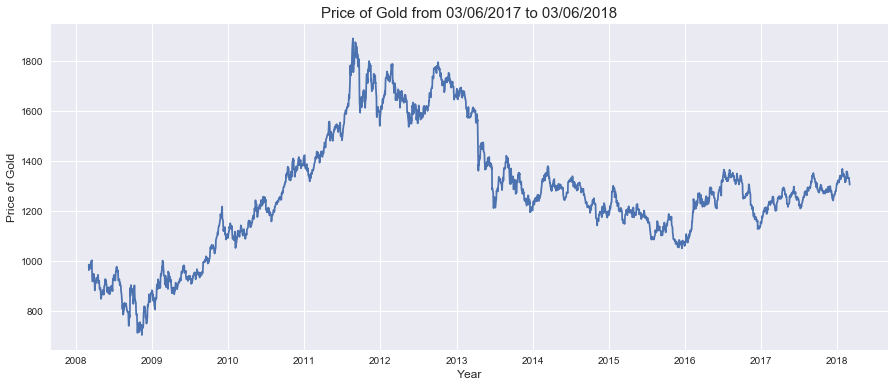

In [12]:
plt.plot(stationary_check_gold_price)
plt.ylabel('Price of Gold', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Price of Gold from 03/06/2017 to 03/06/2018', fontsize=15)
plt.show()

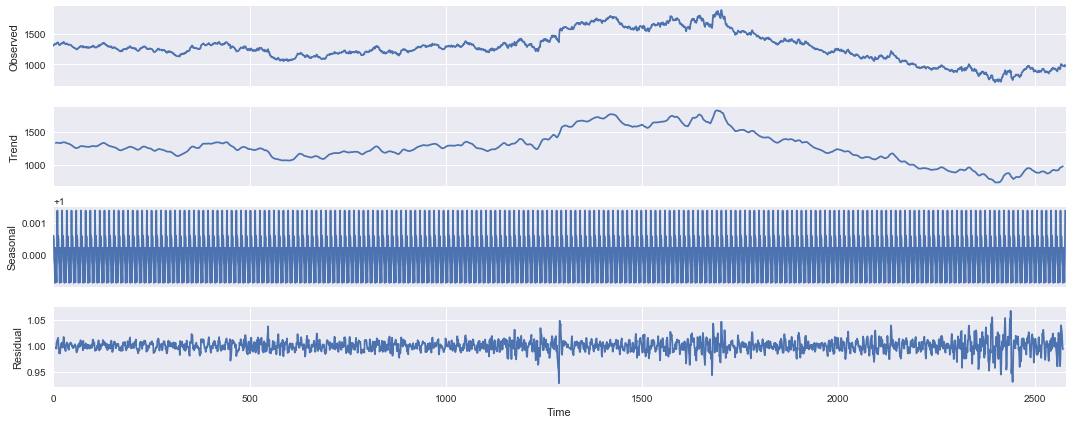

In [13]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(stationary_check_gold_price.values,freq=12,model="multiplicative")
fig = res.plot()

We see that there is increasing / decreasing trend, also we can see some seasonal, tred and noise effects.

**Non-Stationary Time Series - Silver**
1. Identify obvious stationary and non-stationary time series using line plot.

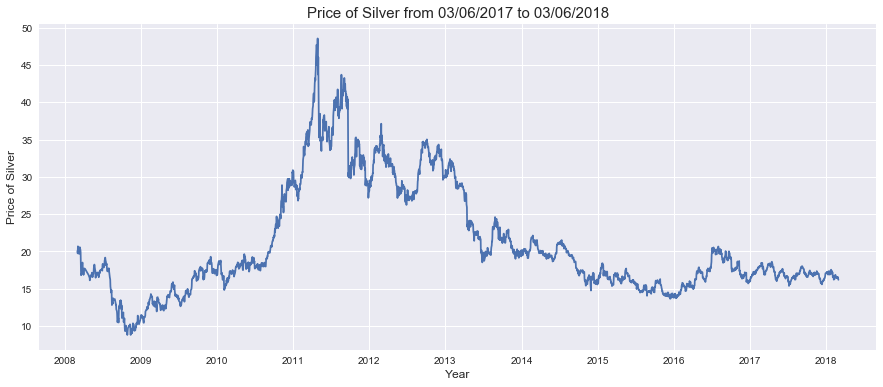

In [14]:
plt.plot(stationary_check_silver_price)
plt.ylabel('Price of Silver', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Price of Silver from 03/06/2017 to 03/06/2018', fontsize=15)
plt.show()

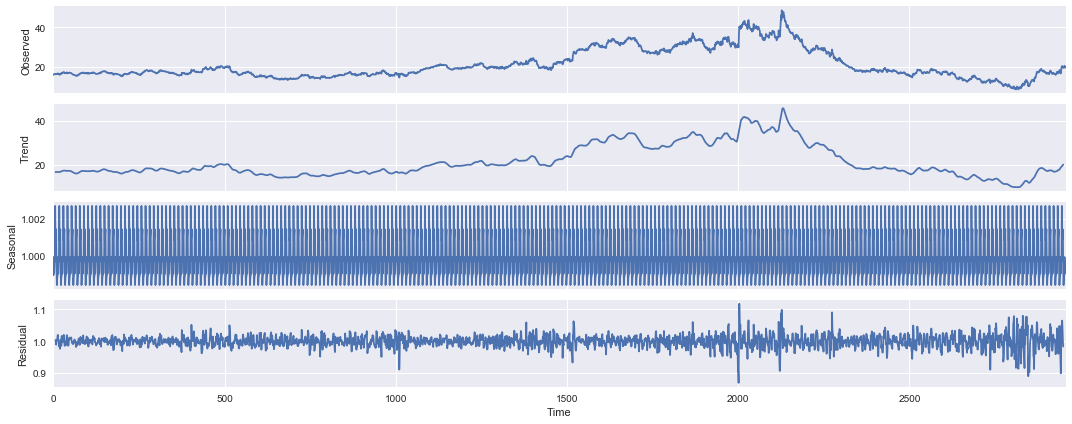

In [15]:
# multiplicative
res = sm.tsa.seasonal_decompose(stationary_check_silver_price.values,freq=12,model="multiplicative")
fig = res.plot()

We see similar trend as gold, there is increase and decrease trend,also we can see some seasonal, tred and noise effects.

** Checks for Stationarity - Gold **
2. Summary Statistics
    - A quick and dirty check to see if your time series is non-stationary is to review summary statistics.
    - We can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.
    - Because we are looking at the mean and variance, we are assuming that the data conforms to a Gaussian (also called the bell curve or normal) distribution.
    - We can also quickly check this by eyeballing a histogram of our observations.


We can split the time series into two contiguous sequences. We can then calculate the mean and variance of each group of numbers and compare the values.

In [16]:
split = len(stationary_check_gold_price) / 2
historical_data_gold1, historical_data_gold2 = stationary_check_gold_price[0:split], stationary_check_gold_price[split:]
mean1, mean2 = historical_data_gold1.mean(), historical_data_gold2.mean()
var1, var2 = historical_data_gold1.var(), historical_data_gold2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=1250.638185, mean2=1293.200078
variance1=6113.396886, variance2=109016.025221


We can see the mean and variance look very different. We have a non-stationary time series. Check if assuming a Gaussian distribution makes sense in this case by plotting the values of the time series as a histogram.

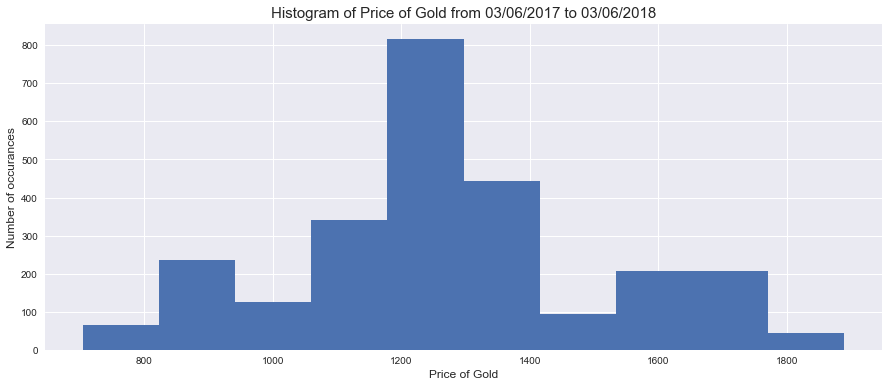

In [17]:
stationary_check_gold_price.hist(bins=10)
plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('Price of Gold', fontsize=12)
plt.title('Histogram of Price of Gold from 03/06/2017 to 03/06/2018', fontsize=15)
plt.show()

Indeed the distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful.

** Checks for Stationarity - Silver **

Following similar steps as for Gold data to check the Stationarity of silver dataset

In [19]:
split = len(stationary_check_silver_price) / 2
X1, X2 = stationary_check_silver_price[0:split], stationary_check_silver_price[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=17.707338, mean2=24.808696
variance1=4.840430, variance2=78.114364


We can see that mean and variance look very different similar to gold dataset. We have a non-stationary time series. Check if assuming a Gaussian distribution makes sense in this case by plotting the values of the time series as a histogram.

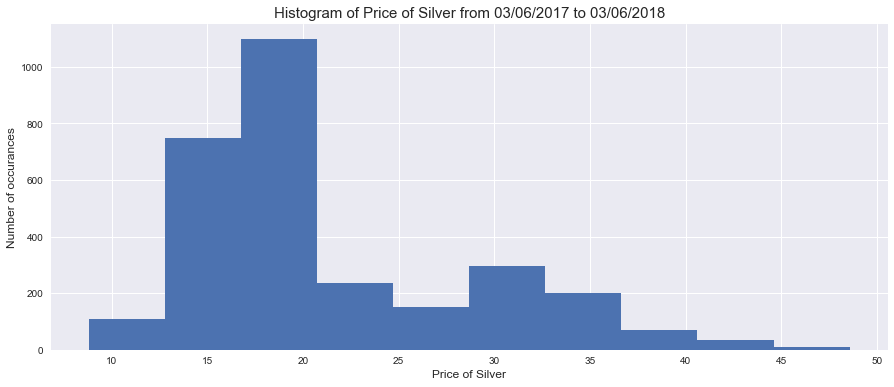

In [20]:
stationary_check_silver_price.hist(bins=10)
plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('Price of Silver', fontsize=12)
plt.title('Histogram of Price of Silver from 03/06/2017 to 03/06/2018', fontsize=15)
plt.show()

Indeed the distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful.

** Statistical tests - Gold **

1. *Plotting Rolling Statistics*: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

2. *Augmented Dickey-Fuller test*: This is one of the statistical tests for checking stationarity, The [Augmented Dickey-Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) is a type of statistical test called a [unit root test](https://en.wikipedia.org/wiki/Unit_root_test). 
    - Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    - Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
    - p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
    - p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
    - The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

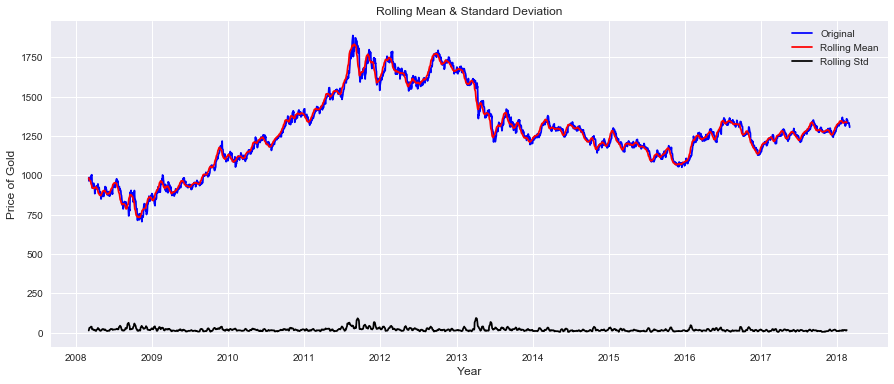

Results of Dickey-Fuller Test:
Test Statistic                   -1.231596
p-value                           0.659858
#Lags Used                       11.000000
Number of Observations Used    2567.000000
Critical Value (5%)              -2.862667
Critical Value (1%)              -3.432900
Critical Value (10%)             -2.567370
dtype: float64


In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, commodity):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.ylabel('Price of {}'.format(commodity), fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

test_stationarity(stationary_check_gold_price, 'Gold')

Though the variation in standard deviation is small, mean is clearly varying with time and this is not a stationary series. Also, the test statistic higher than the critical values, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).

**Statistical tests - Silver**

Following similar steps for Silver data

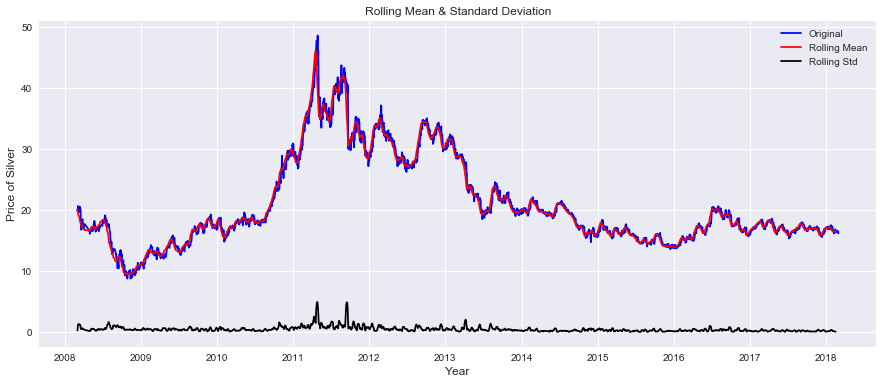

Results of Dickey-Fuller Test:
Test Statistic                   -1.743066
p-value                           0.409071
#Lags Used                       18.000000
Number of Observations Used    2937.000000
Critical Value (5%)              -2.862525
Critical Value (1%)              -3.432578
Critical Value (10%)             -2.567294
dtype: float64


In [22]:
test_stationarity(stationary_check_silver_price, 'Silver')

Similar to gold prices, silver prices is also non-stationary.

### Part 1: Conculsion

** Previous gold or silver prices are good predictors for their future prices? **

Answer : It depends on the modeling approach we take. If we are allowed to preprocess the data as required by different models, we can use the previous prices of gold or silver and modeify this as required for model processing to predict future prices, as follows. 

ARIMA Model: No, we cant use raw previous gold or silver prices to predict the future prices as it is non-stationary data using ARIMA model. We need convert this data into stationary data by using techniques like aggregation, smoothing, Moving Average, eliminating trend and seasonality et al.

Linear regression: Preprocessing with exponential smoothing and approaches like using step function using previous data as predictor, rolling window averge 3, 9 or 12 days data as predictor and next day price as dependant variable, we can forecast the future prices.

LSTM (RNN) Model : We can use timestep current day as predictor & next day data as dependant variable we can use Neural network model to predict future prices using the previous prices of gold & silver

Note: Time series forecasting of Glod / Silver prices with this limited dataset is typically very poor and applies only to short durations, there is lot of noise and many hidden socio-economic factors and influences, for the prices to be very well captured by model.


## Part 2
**check if an increase or decrease in the price is predictable**

**Some intutions** : 

- In historical data of glod and silver we have a field Change % which indicates, % change change from previous day to next day.  
- Using Change % feature we can create a feature increase (1) or decrease (0), which will essentially create  target labeling for this dataset.

Lets create target label

In [23]:
historical_data_gold['Label'] = historical_data_gold['Change%'].str.replace('%','').astype(float).apply(lambda x: 1 if x > 0 else 0)
historical_data_gold.head(10)

,Date,Price,Open,High,Low,Vol.,Change%,Label
0,2018-03-01,"1,305.20","1,319.30","1,322.30","1,303.60",421.74K,-0.96%,0
1,2018-02-28,"1,317.90","1,318.90","1,323.70","1,316.70",263.80K,-0.05%,0
2,2018-02-27,"1,318.60","1,334.70","1,338.40","1,314.40",334.72K,-1.07%,0
3,2018-02-26,"1,332.80","1,330.40","1,342.90","1,328.00",247.24K,0.19%,1
4,2018-02-23,"1,330.30","1,333.70","1,334.20","1,327.70",167.85K,-0.18%,0
5,2018-02-22,"1,332.70","1,326.20","1,334.40","1,322.90",206.24K,0.05%,1
6,2018-02-21,"1,332.10","1,331.20","1,338.50","1,324.40",255.62K,0.07%,1
7,2018-02-20,"1,331.20","1,350.20","1,354.00","1,330.60",374.05K,-1.23%,0
8,2018-02-19,"1,347.80","1,350.40","1,353.90","1,347.40",-,-0.20%,0
9,2018-02-18,"1,350.50","1,349.70","1,352.40","1,349.70",-,-0.42%,0


Lets analyze increase / decrease of price

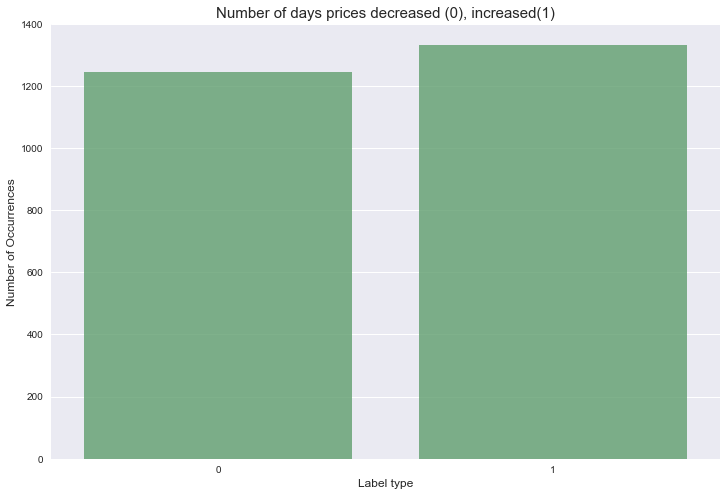

In [24]:
cnt_label = historical_data_gold.Label.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_label.index, cnt_label.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label type', fontsize=12)
plt.title('Number of days prices decreased (0), increased(1)', fontsize=15)
plt.show()

In [25]:
from pandas import DataFrame
from pandas import concat

historical_data_gold = historical_data_gold.set_index('Date')
#convert all features to float type
historical_data_gold['Price'] = historical_data_gold['Price'].str.replace(',', '').astype(float)
historical_data_gold['Open'] = historical_data_gold['Open'].str.replace(',', '').astype(float)
historical_data_gold['High'] = historical_data_gold['High'].str.replace(',', '').astype(float)
historical_data_gold['Low'] = historical_data_gold['Low'].str.replace(',', '').astype(float)
historical_data_gold['Vol.'] = historical_data_gold['Vol.'].str.replace('K', '')
historical_data_gold['Vol.'] = historical_data_gold['Vol.'].str.replace('-', '0').astype(float)
historical_data_gold['Change%'] = historical_data_gold['Change%'].str.replace('%', '').astype(float)


Lets look at the data and see how they are populated and they are useful

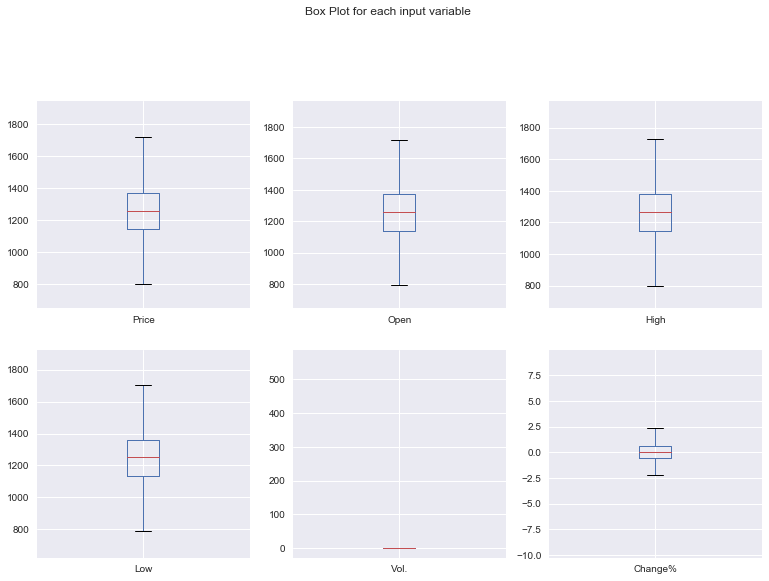

In [26]:
historical_data_gold.drop('Label', axis=1).plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(13,13), 
                                        title='Box Plot for each input variable')
plt.show()

Looking at the plot, we canc see that column Vol. wont be useful.

Lets visualize the data

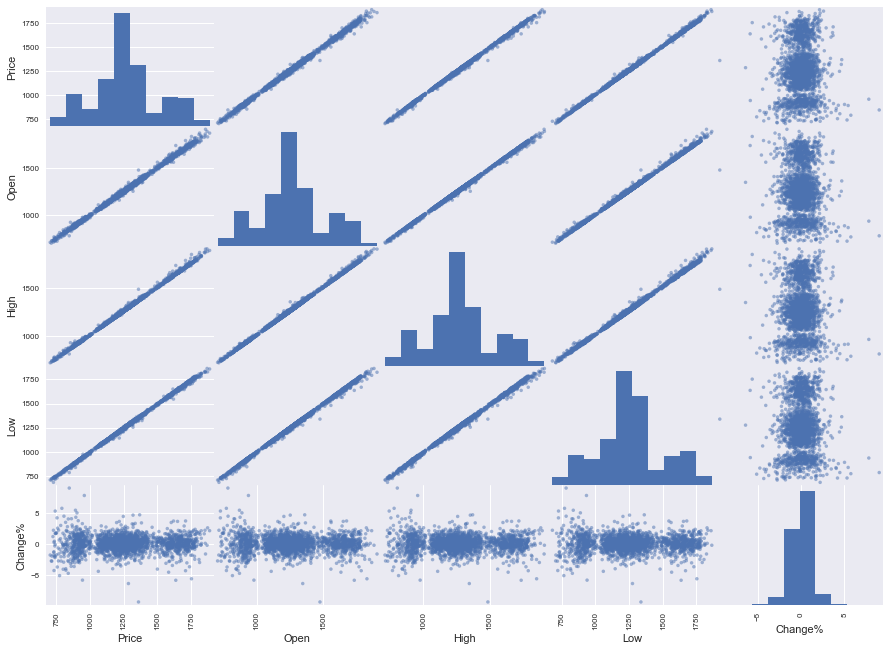

In [39]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(historical_data_gold.drop('Vol.', axis=1).drop('Label', axis=1), figsize=(15,11))
plt.show()

We see from above plot that Price, Opne, High, Low feature are highly correlated with each other. So we can simply remove this features and represent stastical power using data of Price.

In [40]:
df = historical_data_gold.drop(['High','Low', 'Open', 'Vol.'], axis=1)

df.head()

,Price,Change%,Label
Date,,,
2018-03-01,1305.2,-0.96,0
2018-02-28,1317.9,-0.05,0
2018-02-27,1318.6,-1.07,0
2018-02-26,1332.8,0.19,1
2018-02-23,1330.3,-0.18,0


Using newly added features we can predict the historical gold price goes increases (1) or decreases (0).

Time series dataset of historical gold / silver dataset must be transformed to be modeled as supervised classification learning problem.

We can create different set of features from timeseries historical gold / silver dataset

1. Window Features : Summary values over a fixed window of prior time steps
2. Lag Features : Values at prior time steps
3. Date Time Features : Component of time step itself for each observation



In [43]:
historical_data_gold_shifted_window = stationary_check_gold_price.expanding()
historical_data_gold_trend = concat([historical_data_gold_shifted_window.min(), historical_data_gold_shifted_window.mean(), 
                    historical_data_gold_shifted_window.max(), stationary_check_gold_price.shift(-3), df], axis=1)
historical_data_gold_trend.columns = ['gold_price_min','gold_price_mean','gold_price_max','gold_price_prev_step_3', 'Price','Change%', 'Label']
historical_data_gold_trend['Month'] = [historical_data_gold_trend.index[i].month for i in range(len(historical_data_gold_trend))]
historical_data_gold_trend['Day'] = [historical_data_gold_trend.index[i].day for i in range(len(historical_data_gold_trend))]

historical_data_gold_trend.head()

,gold_price_min,gold_price_mean,gold_price_max,gold_price_prev_step_3,Price,Change%,Label,Month,Day
Date,,,,,,,,,
2018-03-01,1305.2,1305.200,1305.2,1332.8,1305.2,-0.96,0,3,1
2018-02-28,1305.2,1311.550,1317.9,1330.3,1317.9,-0.05,0,2,28
2018-02-27,1305.2,1313.900,1318.6,1332.7,1318.6,-1.07,0,2,27
2018-02-26,1305.2,1318.625,1332.8,1332.1,1332.8,0.19,1,2,26
2018-02-23,1305.2,1320.960,1332.8,1331.2,1330.3,-0.18,0,2,23


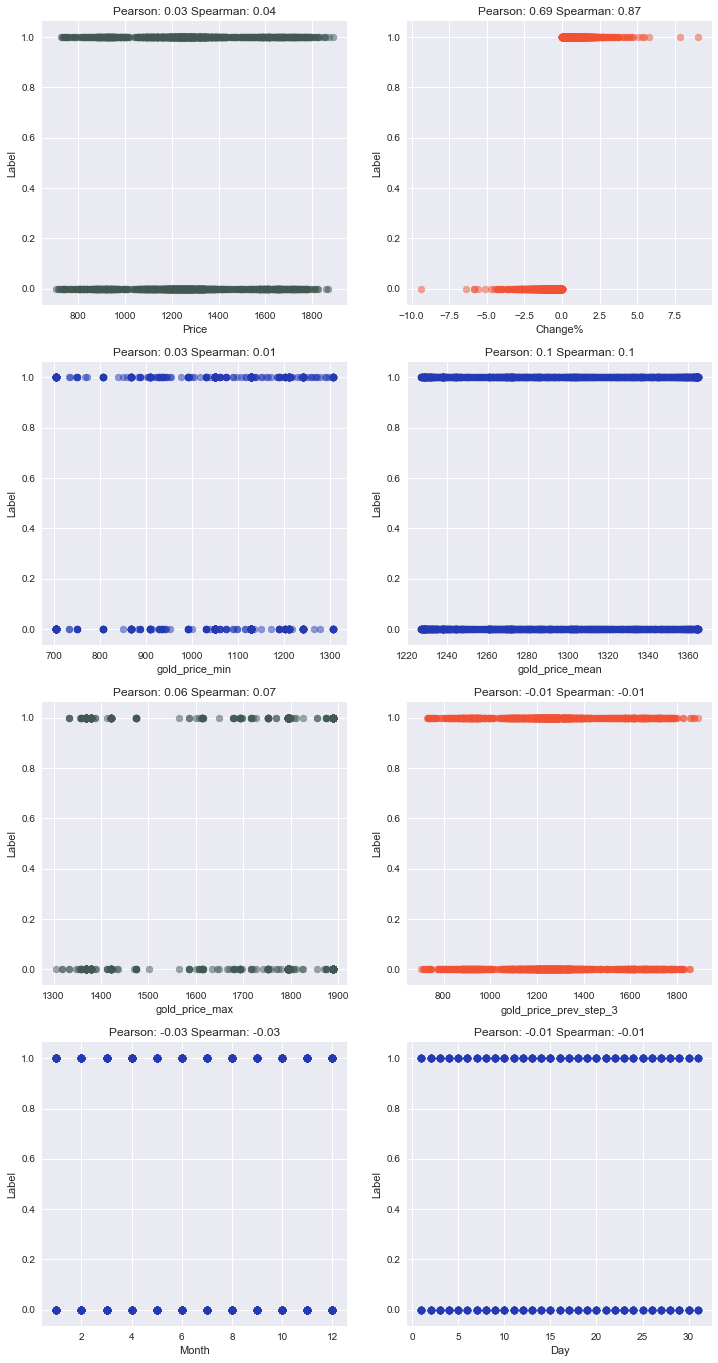

In [71]:
# plot correlated values
plt.rcParams['figure.figsize'] = [12, 24]

fig, ax = plt.subplots(nrows=4, ncols=2)

ax=ax.flatten()

cols = ['Price', 'Change%','gold_price_min','gold_price_mean','gold_price_max','gold_price_prev_step_3','Month','Day']
colors=['#415952', '#f35134', '#243AB5', '#243AB5','#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    i.set_ylabel('Label')
    i.scatter(historical_data_gold_trend[cols[j]], df['Label'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%historical_data_gold_trend.corr().loc[cols[j]]['Label'].round(2)+' Spearman: %s'%historical_data_gold_trend.corr(method='spearman').loc[cols[j]]['Label'].round(2))
    j+=1

plt.show()

We can see some small positive, negative corrlation to some of the features. Using these we can predict weather price will increase or decrease, similar analysis can be done for silver data too.


### Part 2: Conculsion

** check if an increase or decrease in the price is predictable? **

Answer : Yes. Based on the above analysis of categorical feature 'Label' we can use various classification algorithms to classify weather price will increase or decrease.